In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import mdtraj

from lammps_utils.io import data2gro
from lammps_utils.smooth._smooth import savitzky_golay

In [2]:
filepath_data = Path("./eq3_last.data")

In [3]:
# convert LAMMPS data file to GROMACS gro file to load it with MDTraj
data2gro(filepath_data, filepath_data.with_suffix(".gro"))

In [4]:
traj: mdtraj.Trajectory = mdtraj.load(
    filepath_data.with_name("eq3.xtc"), top=filepath_data.with_suffix(".gro")
)


In [5]:
density = mdtraj.density(traj) / 1000  # kg/m3 to g/cm3

In [6]:
rg = mdtraj.compute_rg(traj)  # nm

In [7]:
time = traj.time / 1000  # ps to ns


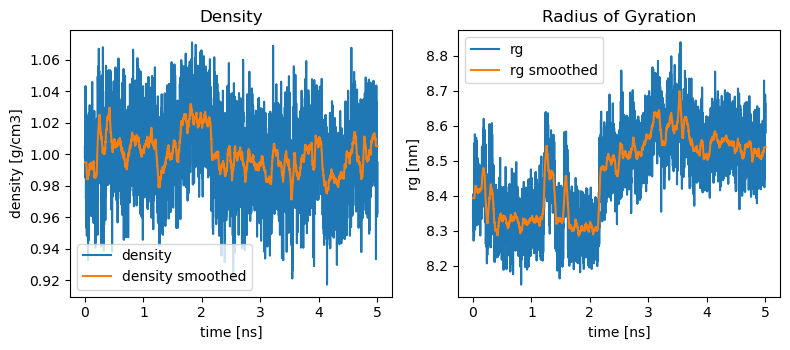

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(8.0, 3.6))
axes[0].plot(time, density, label="density")
axes[0].plot(
    time,
    savitzky_golay(density, window_size=51, order=0),
    label="density smoothed",
)
axes[0].set_xlabel("time [ns]")
axes[0].set_ylabel("density [g/cm3]")
axes[0].set_title("Density")
axes[0].legend()

axes[1].plot(time, rg, label="rg")
axes[1].plot(
    time,
    savitzky_golay(rg, window_size=51, order=0),
    label="rg smoothed",
)
axes[1].set_xlabel("time [ns]")
axes[1].set_ylabel("rg [nm]")
axes[1].set_title("Radius of Gyration")
axes[1].legend()

fig.tight_layout()